In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [5]:
tfdataset=pd.read_csv('C:/Users/RANSHUL/OneDrive/Desktop/Stock market prediction/TCS.NS.csv')

In [8]:
tfdataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-16,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
1,2004-01-19,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
2,2004-01-20,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
3,2004-01-21,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
4,2004-01-22,38.387501,38.387501,38.387501,38.387501,27.19158,0.0


In [3]:
tfdataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5012,2024-04-09,3984.000000,4015.850098,3925.050049,3946.550049,3946.550049,1876992.0
5013,2024-04-10,3956.399902,3990.199951,3918.000000,3984.649902,3984.649902,2101965.0
5014,2024-04-12,3971.000000,4013.350098,3945.500000,4001.399902,4001.399902,4354821.0
5015,2024-04-15,4001.399902,4064.199951,3919.050049,3941.199951,3941.199951,4200329.0
5016,2024-04-16,3902.000000,3928.699951,3862.850098,3872.800049,3872.800049,3051177.0


In [36]:
tfdataset.info()
len(tfdataset)

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 5016
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5009 non-null   object 
 1   Open       5009 non-null   float64
 2   High       5009 non-null   float64
 3   Low        5009 non-null   float64
 4   Close      5009 non-null   float64
 5   Adj Close  5009 non-null   float64
 6   Volume     5009 non-null   float64
dtypes: float64(6), object(1)
memory usage: 313.1+ KB


5009

In [37]:
tfdataset.dropna(inplace=True)

In [38]:
ma_200days=tfdataset.Close.rolling(200).mean()
ma_200days

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5012    3636.328755
5013    3640.377505
5014    3644.332505
5015    3647.900005
5016    3650.973005
Name: Close, Length: 5009, dtype: float64

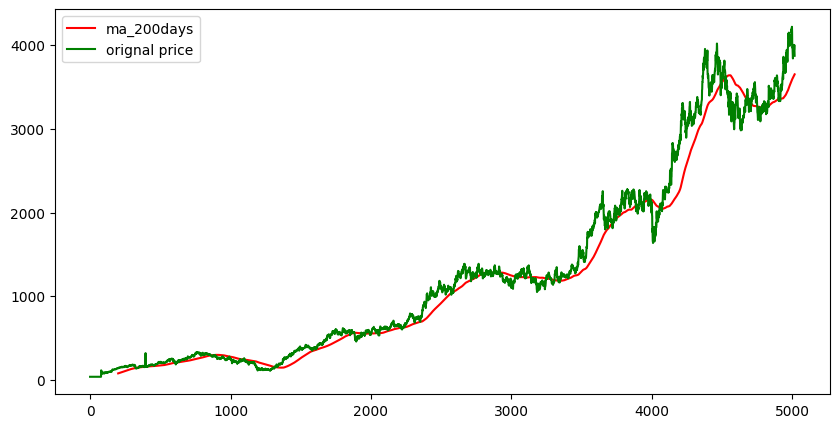

In [39]:
plt.figure(figsize=(10,5))
plt.plot(ma_200days,'r',label='ma_200days')
plt.plot(tfdataset.Close,'g',label='orignal price')
plt.legend()
plt.show()

In [40]:
ma_400days= tfdataset.Close.rolling(400).mean()
ma_400days

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5012    3446.464500
5013    3448.380625
5014    3450.328625
5015    3452.350250
5016    3454.004375
Name: Close, Length: 5009, dtype: float64

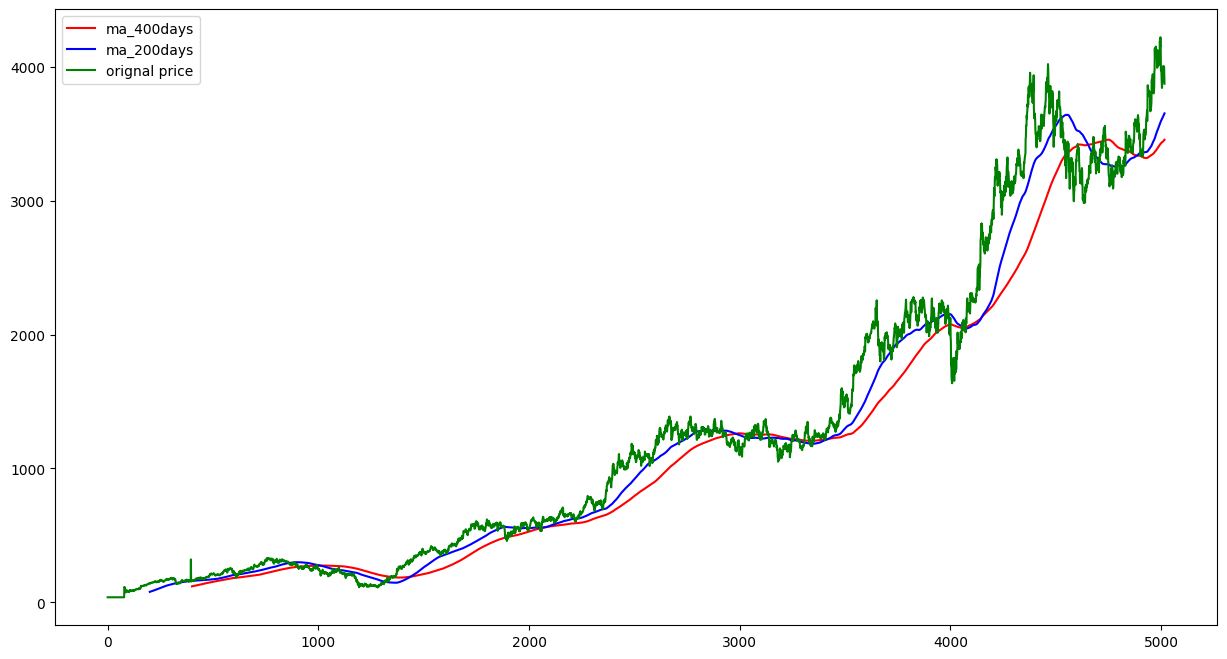

In [41]:
plt.figure(figsize=(15,8))
plt.plot(ma_400days,'r',label='ma_400days')
plt.plot(ma_200days,'b',label='ma_200days')
plt.plot(tfdataset.Close,'g',label='orignal price')
plt.legend() 
plt.show()

In [42]:
tfdataset.shape

(5009, 7)

In [48]:
# 80% train data
train=pd.DataFrame(tfdataset.Close[0:int(len(tfdataset)*0.80)])
# 20% test data
test=pd.DataFrame(tfdataset.Close[int(len(tfdataset)*0.80):len(tfdataset)])

print(train.shape)
print(test.shape)

(4007, 1)
(1002, 1)


In [47]:
train.head()

,Close
0,38.387501
1,38.387501
2,38.387501
3,38.387501
4,38.387501


In [49]:
test.head()

,Close
4015,1778.500000
4016,1826.099976
4017,1708.750000
4018,1654.199951
4019,1775.199951


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

In [79]:
data_training_array=scaler.fit_transform(train)
data_training_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.76439599],
       [0.78254681],
       [0.79752744]])

In [80]:
data_training_array.shape

(4007, 1)

In [81]:
#two empty list
x_train=[]
y_train=[]
for i in range(200,data_training_array.shape[0]):
    x_train.append(data_training_array[i-200:i])
    y_train.append(data_training_array[i,0])


In [84]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [100]:
x_train.shape

(3807, 200, 1)

In [167]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [168]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [188]:
model.fit(x_train , y_train, epochs = 50)

Epoch 1/50
119/119 [==============================] - 66s 550ms/step - loss: 0.0013
Epoch 2/50
119/119 [==============================] - 69s 579ms/step - loss: 0.0014
Epoch 3/50
119/119 [==============================] - 66s 554ms/step - loss: 0.0015
Epoch 4/50
119/119 [==============================] - 66s 558ms/step - loss: 0.0013
Epoch 5/50
119/119 [==============================] - 66s 559ms/step - loss: 0.0013
Epoch 6/50
119/119 [==============================] - 66s 555ms/step - loss: 0.0014
Epoch 7/50
119/119 [==============================] - 67s 564ms/step - loss: 0.0013
Epoch 8/50
119/119 [==============================] - 66s 558ms/step - loss: 0.0014
Epoch 9/50
119/119 [==============================] - 66s 559ms/step - loss: 0.0012
Epoch 10/50
119/119 [==============================] - 67s 559ms/step - loss: 0.0013
Epoch 11/50
119/119 [==============================] - 66s 559ms/step - loss: 0.0013
Epoch 12/50
119/119 [==============================] - 66s 558ms/step - lo

In [189]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 200, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 200, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 200, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 200, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 200, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 200, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [190]:
test.head()

,Close
4015,1778.500000
4016,1826.099976
4017,1708.750000
4018,1654.199951
4019,1775.199951


In [191]:
past_200_days=train.tail(200)
past_200_days.head()

,Close
3815,2181.750000
3816,2231.500000
3817,2252.800049
3818,2260.899902
3819,2254.100098


In [192]:
final_df = pd.concat([past_200_days, test], ignore_index=True)
final_df.head()

,Close
0,2181.750000
1,2231.500000
2,2252.800049
3,2260.899902
4,2254.100098


In [193]:
data_test_array=scaler.fit_transform(final_df)

In [194]:
x_test=[]
y_test=[]
for i in range(200,data_test_array.shape[0]):
    x_test.append(data_test_array[i-200:i])
    y_test.append(data_test_array[i,0])


In [195]:
x_test=np.array(x_test)
y_test=np.array(y_test)

x_test.shape
y_test.shape

(1002,)

In [196]:
y_predict=model.predict(x_test)

32/32 [==============================] - 7s 207ms/step


In [197]:
y_predict.shape


(1002, 1)

In [198]:
y_test

array([0.05503505, 0.07346394, 0.02803052, ..., 0.91565678, 0.89234967,
       0.86586784])

In [199]:
scaler.scale_

array([0.00038716])

In [200]:
scale_fac=1/0.00038716
scale_fac

2582.911457795227

In [201]:
y_predict=y_predict*scale_fac
y_test=y_test*scale_fac

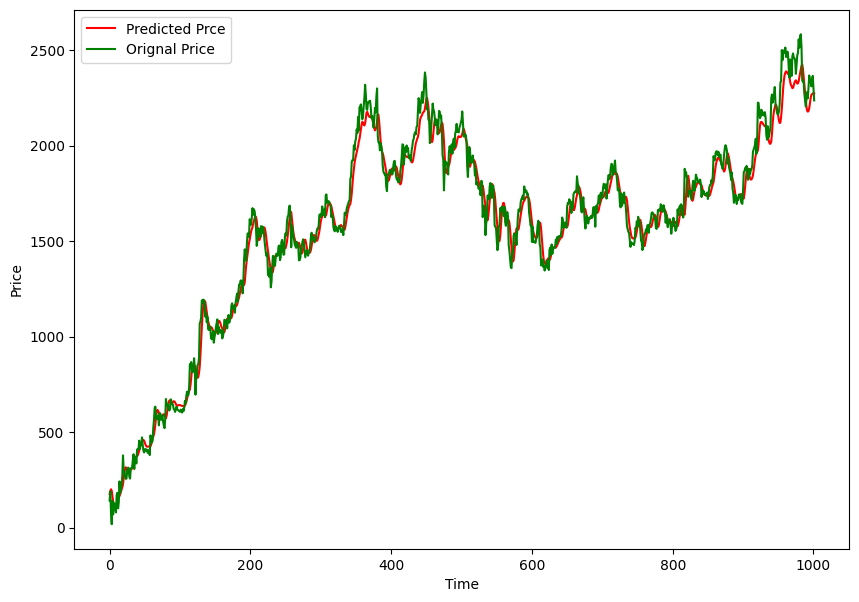

In [202]:
plt.figure(figsize=(10,7))
plt.plot(y_predict,'r',label= 'Predicted Prce')
plt.plot(y_test,'g',label='Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [203]:
model.save('Lstm_model3')

INFO:tensorflow:Assets written to: Lstm_model3\assets


INFO:tensorflow:Assets written to: Lstm_model3\assets


In [204]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import math

print('Mean Absolute Error',metrics.mean_absolute_error(y_predict,y_test))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Error',math.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error 52.564089145551556
Mean Squared Error 4827.2678783951815
Root Mean Error 69.4785425753533
